In [1]:
## loading packages
suppressMessages(library(ChIPseeker))
suppressMessages(library(karyoploteR))
suppressMessages(library(TxDb.Hsapiens.UCSC.hg19.knownGene))
txdb <- TxDb.Hsapiens.UCSC.hg19.knownGene

Warning message:
“multiple methods tables found for ‘aperm’”
Warning message:
“replacing previous import ‘BiocGenerics::aperm’ by ‘DelayedArray::aperm’ when loading ‘SummarizedExperiment’”
Warning message:
“no function found corresponding to methods exports from ‘BSgenome’ for: ‘releaseName’”


In [3]:
hist_list = c("C_H3K4me3", "C_H3K27me3",
             "M_H3K4me3", "M_H3K27me3",
             "P_H3K4me3", "P_H3K27me3")

col_palette = c("#f9ddb1", "#dc6601",
               "#91cbf7", "#0d78c8",
               "#ffcbd1", "#d1001f")

control_list = c("C_IgG", "C_IgG",
                "M_IgG", "M_IgG", 
                "P_IgG", "P_IgG")

meta_list = vector("list", length = length(hist_list))
names(meta_list) = hist_list

for (i in 1:length(hist_list)){
    meta_list[[i]]["hist_name"] = hist_list[i]
    meta_list[[i]]["col"] = col_palette[i]
    meta_list[[i]]["control_name"] = control_list[i]
}

filePath = "/home/data/dianli/projects/hli_hic_cut/processed_data/CUT_RUN/Part3_peak_calling/Step3_peak_calling/"

In [4]:
outputDir = "../plots/CUT_RUN/"
dir.create(outputDir, recursive = T, showWarnings = F)

### PlotCoverage helper function

In [12]:
create_kpPlotCoverage <- function(meta_list, filePath, comp_list = c("C_H3K4me3_rep2", "C_H3K4me3_rep1"), chromosomes = NA, genome = "hg19"){
    at_list = list()
    if (length(comp_list) == 3){
        at_list[[comp_list[1]]] = list(r0 = 0, r1 = 0.24)
        at_list[[comp_list[2]]] = list(r0 = 0.33, r1 = 0.57)
        at_list[[comp_list[3]]] = list(r0 = 0.66, r1 = 0.9)
    }
    if (length(comp_list) == 2){
        at_list[[comp_list[1]]] = list(r0 = 0, r1 = 0.4)
        at_list[[comp_list[2]]] = list(r0 = 0.5, r1 = 0.9)
    }
    if (length(comp_list) == 4){
        at_list[[comp_list[1]]] = list(r0 = 0, r1 = 0.18)
        at_list[[comp_list[2]]] = list(r0 = 0.25, r1 = 0.42)
        at_list[[comp_list[3]]] = list(r0 = 0.49, r1 = 0.66)
        at_list[[comp_list[4]]] = list(r0 = 0.73, r1 = 0.9)
    }
    if (length(comp_list) == 6){
        at_list[[comp_list[1]]] = list(r0 = 0, r1 = 0.1)
        at_list[[comp_list[2]]] = list(r0 = 0.15, r1 = 0.26)
        at_list[[comp_list[3]]] = list(r0 = 0.31, r1 = 0.42)
        at_list[[comp_list[4]]] = list(r0 = 0.47, r1 = 0.58)
        at_list[[comp_list[5]]] = list(r0 = 0.63, r1 = 0.74)
        at_list[[comp_list[6]]] = list(r0 = 0.79, r1 = 0.9)
    }

    if (any(is.na(chromosomes))) chromosomes = c(paste0("chr", 1:22), "chrX")
    plot.params <- getDefaultPlotParams(plot.type=1)
    plot.params$ideogramheight <- 15
    kp <- plotKaryotype(plot.type=1, chromosomes = chromosomes, genome=genome, plot.params=plot.params)
    
    for (hist_name in comp_list){
        bed_file = read.table(file.path(filePath, paste0(hist_name, "_seacr_", meta_list[[hist_name]]["control_name"], ".peaks.stringent.bed")),
                                          header = FALSE, sep="\t",stringsAsFactors=FALSE, quote="") 
        colnames(bed_file) = c("chrom","start","end", "totalSignal", "max", "region")

        kp <- kpPlotCoverage(kp, data=bed_file, r0=at_list[[hist_name]]$r0, r1=at_list[[hist_name]]$r1, col = meta_list[[hist_name]]["col"])
        
    }

}

png 
  2

png 
  2

png 
  2

png 
  2

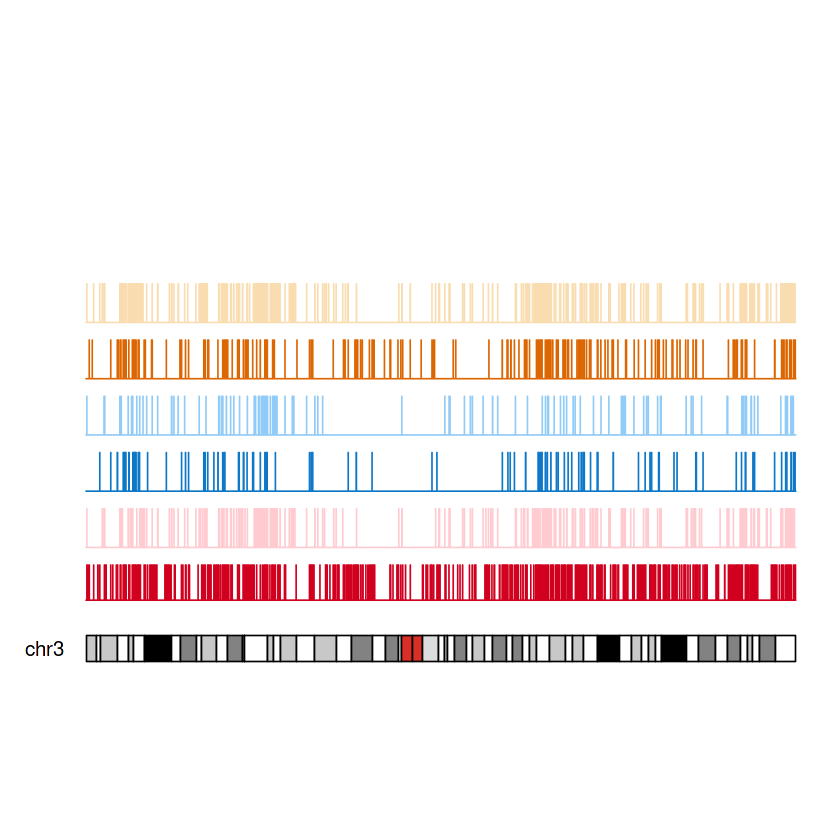

In [14]:
create_kpPlotCoverage(meta_list = meta_list, filePath = filePath, 
                      comp_list = c("P_H3K27me3", "P_H3K4me3",
                                   "M_H3K27me3", "M_H3K4me3",
                                   "C_H3K27me3", "C_H3K4me3"), chromosomes = paste0("chr", c(3)))

pdf(file = file.path(outputDir, "PlotCoverage_chr3.pdf"), width = 10, height = 8)
create_kpPlotCoverage(meta_list = meta_list, filePath = filePath, 
                      comp_list = c("P_H3K27me3", "P_H3K4me3",
                                   "M_H3K27me3", "M_H3K4me3",
                                   "C_H3K27me3", "C_H3K4me3"), chromosomes = paste0("chr", c(3)))
dev.off()

png(file = file.path(outputDir, "PlotCoverage_chr3.png"), width = 10, height = 8, units = "in", res = 300)
create_kpPlotCoverage(meta_list = meta_list, filePath = filePath, 
                      comp_list = c("P_H3K27me3", "P_H3K4me3",
                                   "M_H3K27me3", "M_H3K4me3",
                                   "C_H3K27me3", "C_H3K4me3"), chromosomes = paste0("chr", c(3)))
dev.off()

pdf(file = file.path(outputDir, "PlotCoverage_chr4.pdf"), width = 10, height = 8)
create_kpPlotCoverage(meta_list = meta_list, filePath = filePath, 
                      comp_list = c("P_H3K27me3", "P_H3K4me3",
                                   "M_H3K27me3", "M_H3K4me3",
                                   "C_H3K27me3", "C_H3K4me3"), chromosomes = paste0("chr", c(4)))
dev.off()

png(file = file.path(outputDir, "PlotCoverage_chr4.png"), width = 10, height = 8, units = "in", res = 300)
create_kpPlotCoverage(meta_list = meta_list, filePath = filePath, 
                      comp_list = c("P_H3K27me3", "P_H3K4me3",
                                   "M_H3K27me3", "M_H3K4me3",
                                   "C_H3K27me3", "C_H3K4me3"), chromosomes = paste0("chr", c(4)))
dev.off()

### circlize plot

In [10]:
suppressMessages(library(circlize))

plot_circos <- function(meta_list, filePath, comp_group = c("C_H3K4me3", "C_H3K27me3"), chromosome.index = NA){
    bed_list = list()
    for (hist_name in comp_group){
        bed_list[[hist_name]] = read.table(file.path(filePath, paste0(hist_name, "_seacr_", meta_list[[hist_name]]["control_name"], ".peaks.stringent.bed")),
                                          header = FALSE, sep="\t",stringsAsFactors=FALSE, quote="") 
        colnames(bed_list[[hist_name]]) = c("chrom","start","end", "totalSignal", "max", "region")
    }
    
    if(any(is.na(chromosome.index))){
        chromosome.index = c(paste0("chr", 1:22), "chrX")
    }
    circos.initializeWithIdeogram(plotType = c("axis", "labels"),chromosome.index = chromosome.index)

    for (hist_name in comp_group){
       circos.genomicDensity(bed_list[[hist_name]], 
                             baseline=0, col = meta_list[[hist_name]]["col"], 
                             bg.border="white", 
                             track.height = 0.2) 
    }

    circos.clear()
}

png 
  2

png 
  2

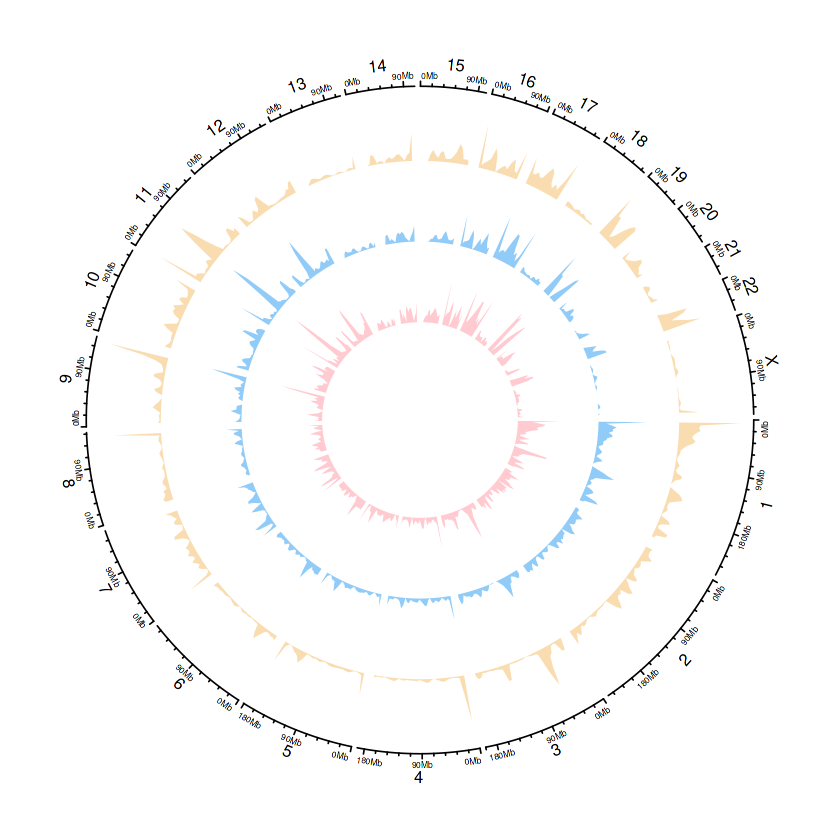

In [14]:
plot_circos(meta_list, filePath, comp_group = c("C_H3K4me3", "M_H3K4me3", "P_H3K4me3"))

pdf(file = file.path(outputDir, "circos_H3K4me3.pdf"), width = 6, height = 6)
plot_circos(meta_list, filePath, comp_group = c("C_H3K4me3", "M_H3K4me3", "P_H3K4me3"))
dev.off()

png(file = file.path(outputDir, "circos_H3K4me3.png"), width = 6, height = 6, units = "in", res = 300)
plot_circos(meta_list, filePath, comp_group = c("C_H3K4me3", "M_H3K4me3", "P_H3K4me3"))
dev.off()

png 
  2

png 
  2

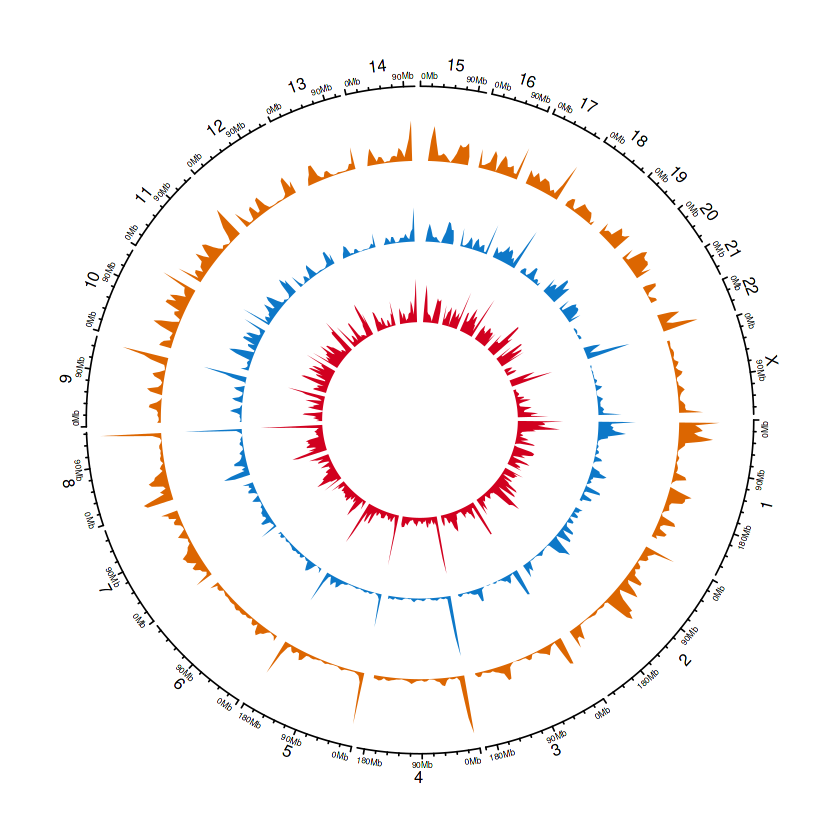

In [15]:
plot_circos(meta_list, filePath, comp_group = c("C_H3K27me3", "M_H3K27me3", "P_H3K27me3"))

pdf(file = file.path(outputDir, "circos_H3K27me3.pdf"), width = 6, height = 6)
plot_circos(meta_list, filePath, comp_group = c("C_H3K27me3", "M_H3K27me3", "P_H3K27me3"))
dev.off()

png(file = file.path(outputDir, "circos_H3K27me3.png"), width = 6, height = 6, units = "in", res = 300)
plot_circos(meta_list, filePath, comp_group = c("C_H3K27me3", "M_H3K27me3", "P_H3K27me3"))
dev.off()

In [2]:
sessionInfo()

R version 4.2.2 (2022-10-31)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 20.04.2 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/blas/libblas.so.3.9.0
LAPACK: /usr/lib/x86_64-linux-gnu/lapack/liblapack.so.3.9.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] TxDb.Hsapiens.UCSC.hg19.knownGene_3.2.2
 [2] GenomicFeatures_1.50.4                 
 [3] AnnotationDbi_1.60.2                   
 [4] Biobase_2.52.0                         
 [5] karyoploteR_1.24.0                     
 [6] regioneR_1.30.0         